 ## Task 1: Data Exploration
 Load the dataset into a Python environment (e.g., Jupyter   Notebook).
 Display the first few rows of the dataset to understand its structure.
 Check for missing values and handle them if necessary.
 Summarize basic statistics (mean, median, standard deviation, e for the numeric columns.tc.)

## Task 2: Data Visualization
 ### 2.1 Univariate Analysis
 Explore the distribution of numeric columns using the following   
visualizations:
- Histograms: Plot the frequency distribution of key numeric variables.
- Box Plots: Identify potential outliers and visualize the spread of
 data.
- Analyze categorical variables by creating the following plots:
- Bar Charts: Visualize the frequency distribution of categorical
 variables.
- Pie Charts: Represent the composition of categorical variables.
  
### 2.2 Bivariate Analysis
- Create scatter plots to explore relationships between pairs of numeric
 variables.
- Use pair plots (scatter matrix) to visualize interactions between
 multiple numeric variables
 simultaneously.
- Investigate the relationship between categorical and numeric
 variables using box plots or
 violin plots.

### 2.3 Multivariate Analysis
- Perform a correlation analysis to identify relationships between
 numeric variables. Visualize
 correlations using a heatmap.
- Create a stacked bar chart to show the distribution of categorical
 variables across multiple
 categories.

In [41]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns


%matplotlib inline
sns.set()

import warnings
warnings.filterwarnings('ignore')

In [42]:
df = pd.read_csv('loan_sanction_test.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [43]:
df.shape

(367, 12)

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


In [45]:
df.isnull().sum()/len(df)*100

Loan_ID              0.000000
Gender               2.997275
Married              0.000000
Dependents           2.724796
Education            0.000000
Self_Employed        6.267030
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           1.362398
Loan_Amount_Term     1.634877
Credit_History       7.901907
Property_Area        0.000000
dtype: float64

In [46]:
df.shape

(367, 12)

In [47]:
## No requirement of dropping any columns 
## we have to handle missing value

In [48]:
num_col=df.select_dtypes(include=['int64','float64'])
cat_col=df.select_dtypes(include='object')

In [49]:
## let's handle the missing values of numerical columns

num_col.mean()

ApplicantIncome      4805.599455
CoapplicantIncome    1569.577657
LoanAmount            136.132597
Loan_Amount_Term      342.537396
Credit_History          0.825444
dtype: float64

In [50]:
for i in num_col:
    df[i].fillna(df[i].median(),inplace=True)

In [51]:
for i in cat_col:
    df[i].fillna(df[i].mode().iloc[0],inplace=True)

In [52]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

## Basic Statistics of the dataset

In [54]:
df.describe() 

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,367.000000,367.000000,367.000000,367.000000,367.000000
mean,4805.599455,1569.577657,135.980926,342.822888,0.839237
std,4910.685399,2334.232099,60.959739,64.658402,0.367814
min,0.000000,0.000000,28.000000,6.000000,0.000000
25%,2864.000000,0.000000,101.000000,360.000000,1.000000
50%,3786.000000,1025.000000,125.000000,360.000000,1.000000
75%,5060.000000,2430.500000,157.500000,360.000000,1.000000
max,72529.000000,24000.000000,550.000000,480.000000,1.000000


## Data Visualization

### 1. Univariate

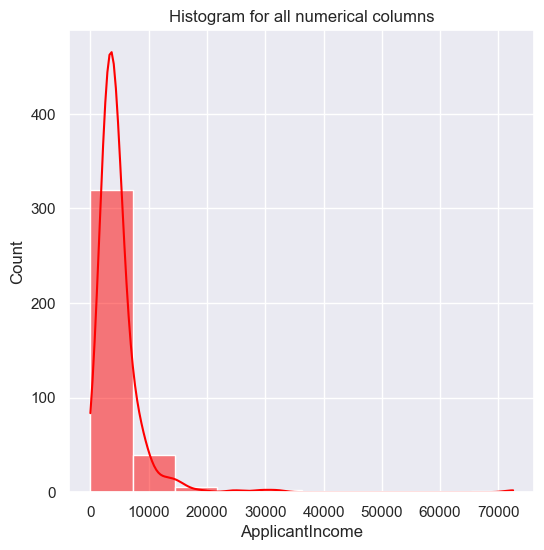

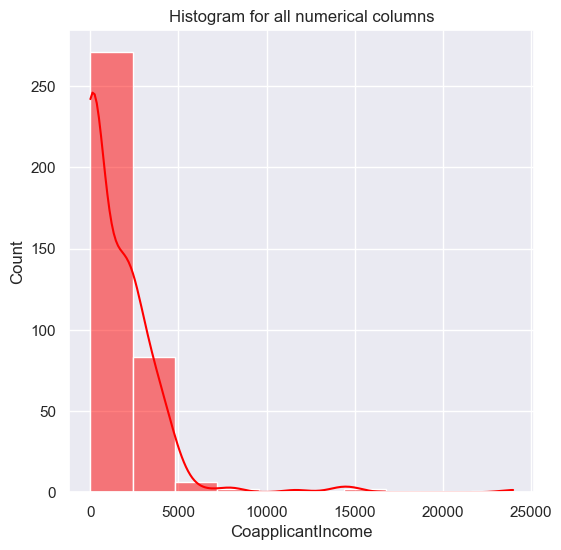

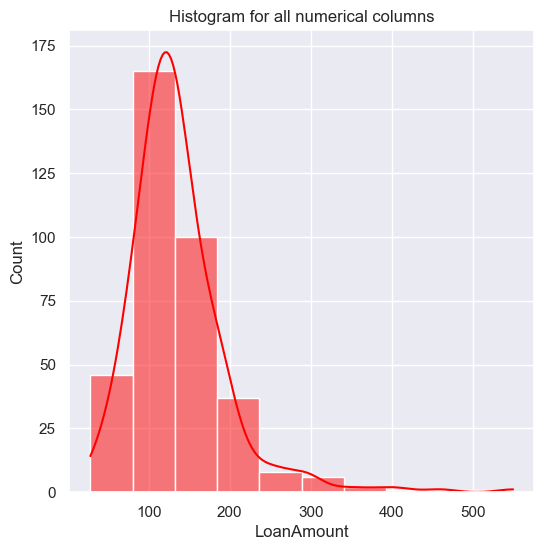

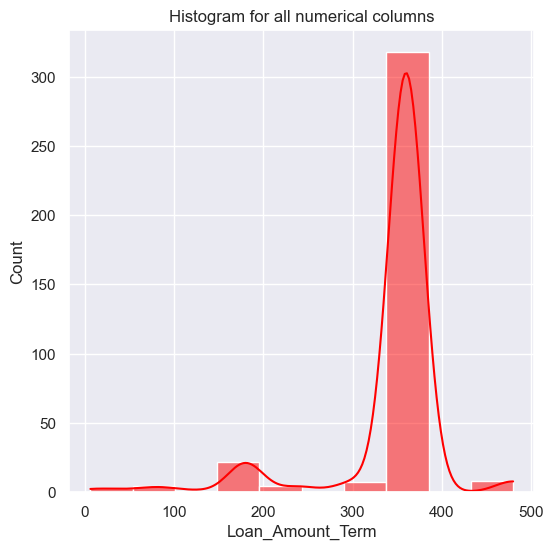

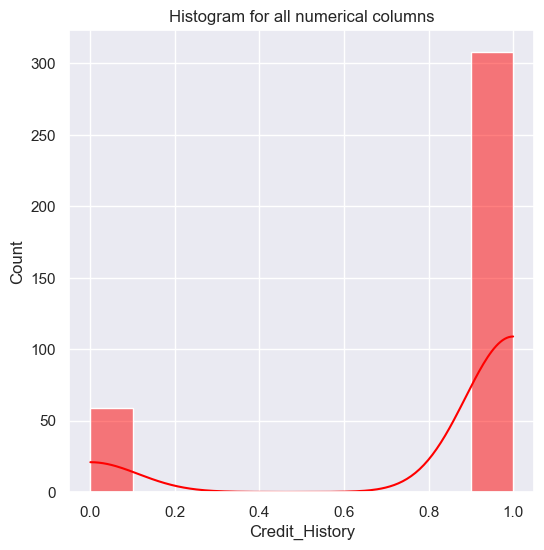

In [56]:
for i in num_col:
    plt.figure(figsize=(6,6))
    sns.histplot(df[i],kde=True,bins=10,color='red')
    plt.title('Histogram for all numerical columns')
    plt.show()

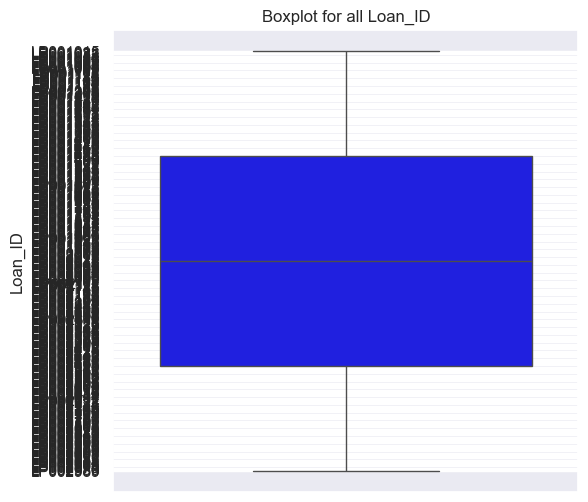

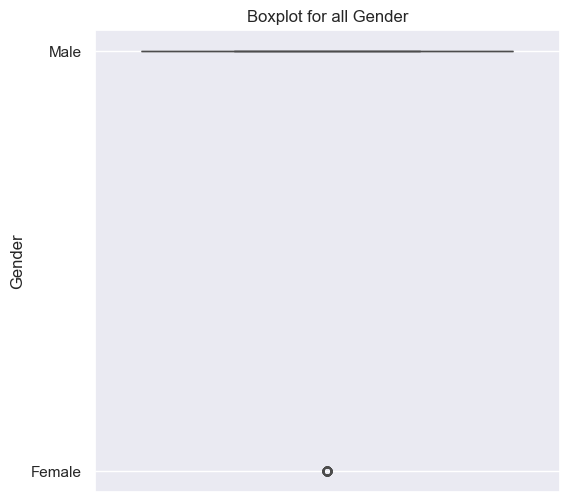

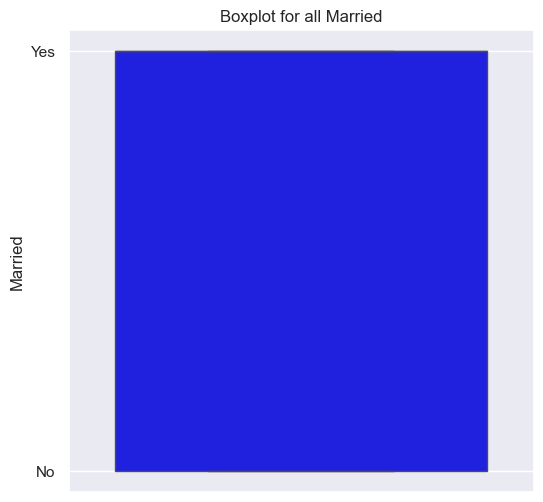

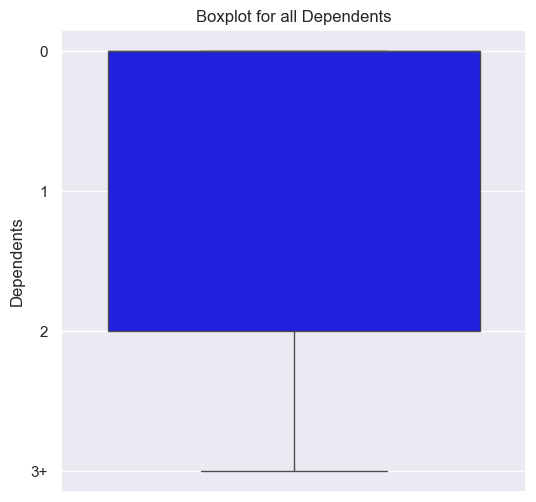

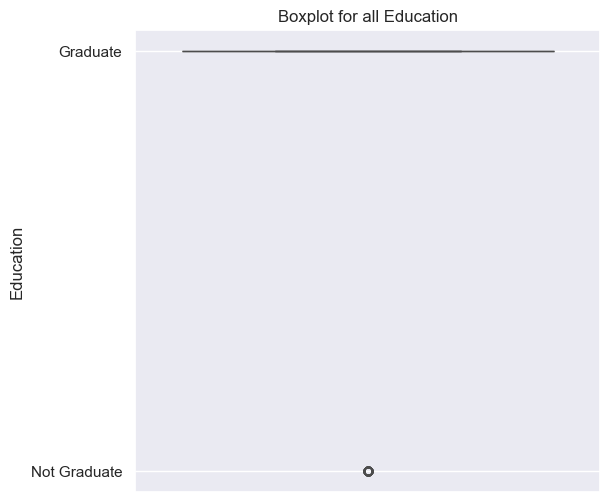

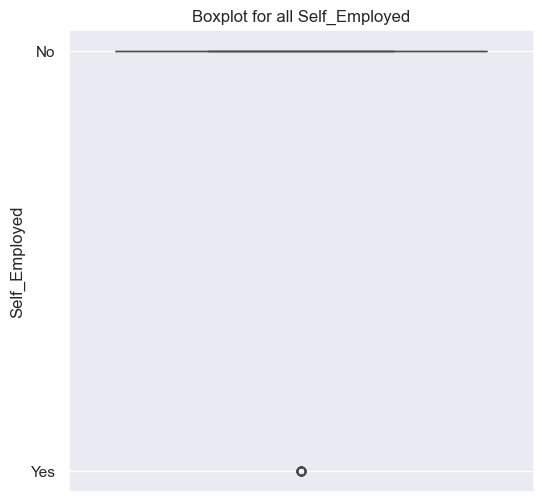

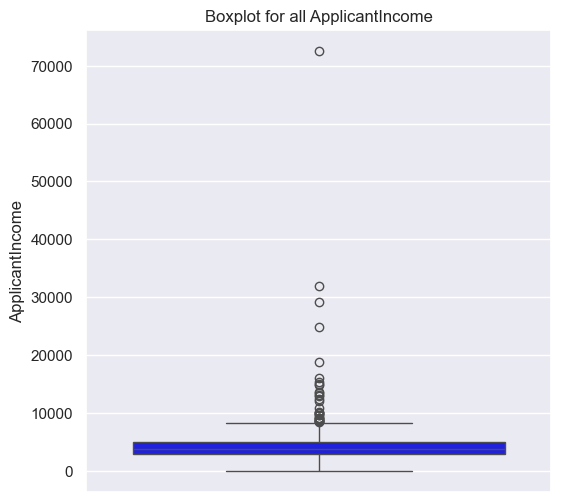

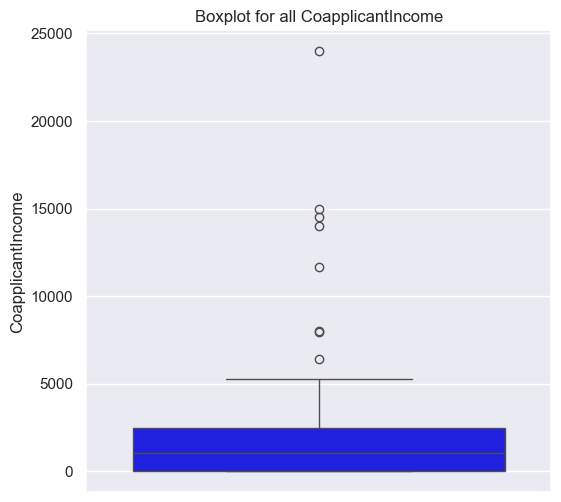

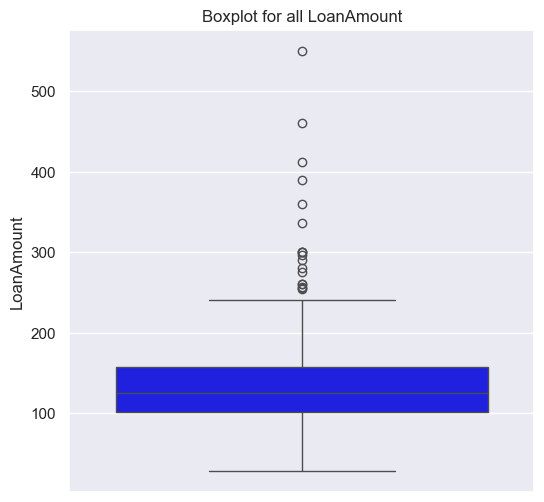

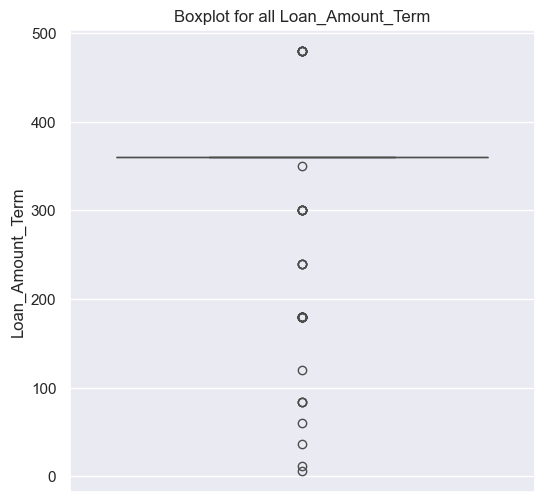

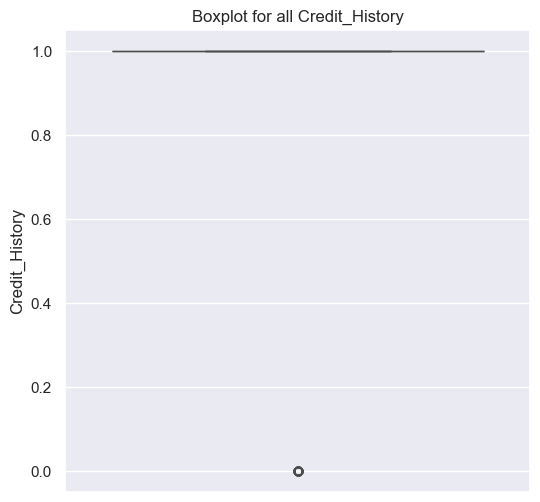

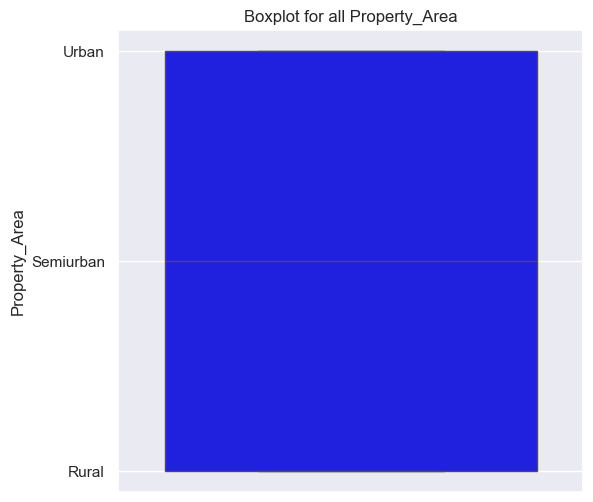

In [57]:
for i in df:
    plt.figure(figsize=(6,6))
    sns.boxplot(data=df[i],color='blue')
    plt.title(f'Boxplot for all {i}')
    plt.show()

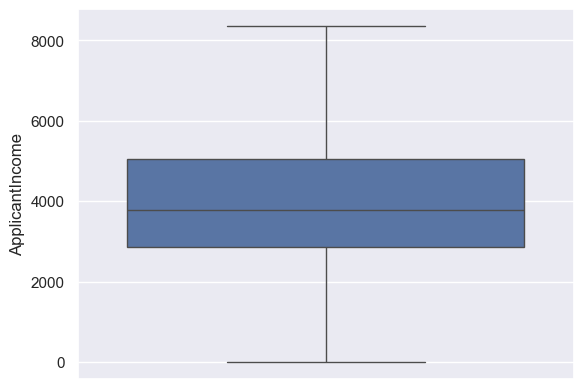

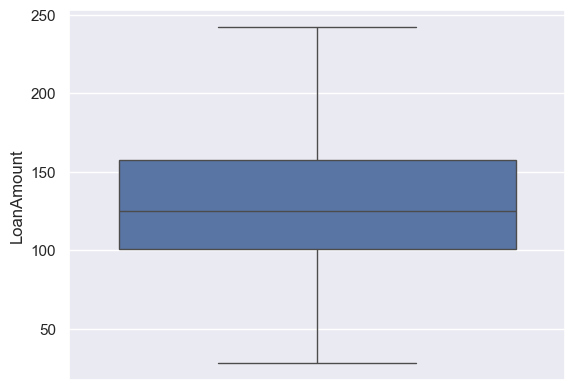

In [58]:


for i in ['ApplicantIncome','LoanAmount']:
    q3=df[i].quantile(0.75)
    q1=df[i].quantile(0.25)
    iqr= q3-q1
    lb=q1-1.5*iqr
    ub=q3+1.5*iqr
    df[i] =np.where(df[i]>ub,ub,np.where(df[i]<lb,lb,df[i]))
    sns.boxplot(df[i])
    plt.show()

## Bivariate

In [60]:
def scatter_plot(data,x,y):
    plt.figure(figsize=(14,10))
    sns.scatterplot(data=data,x=x,y=y)
    plt.title(f'{x} vs {y}')
    plt.show()

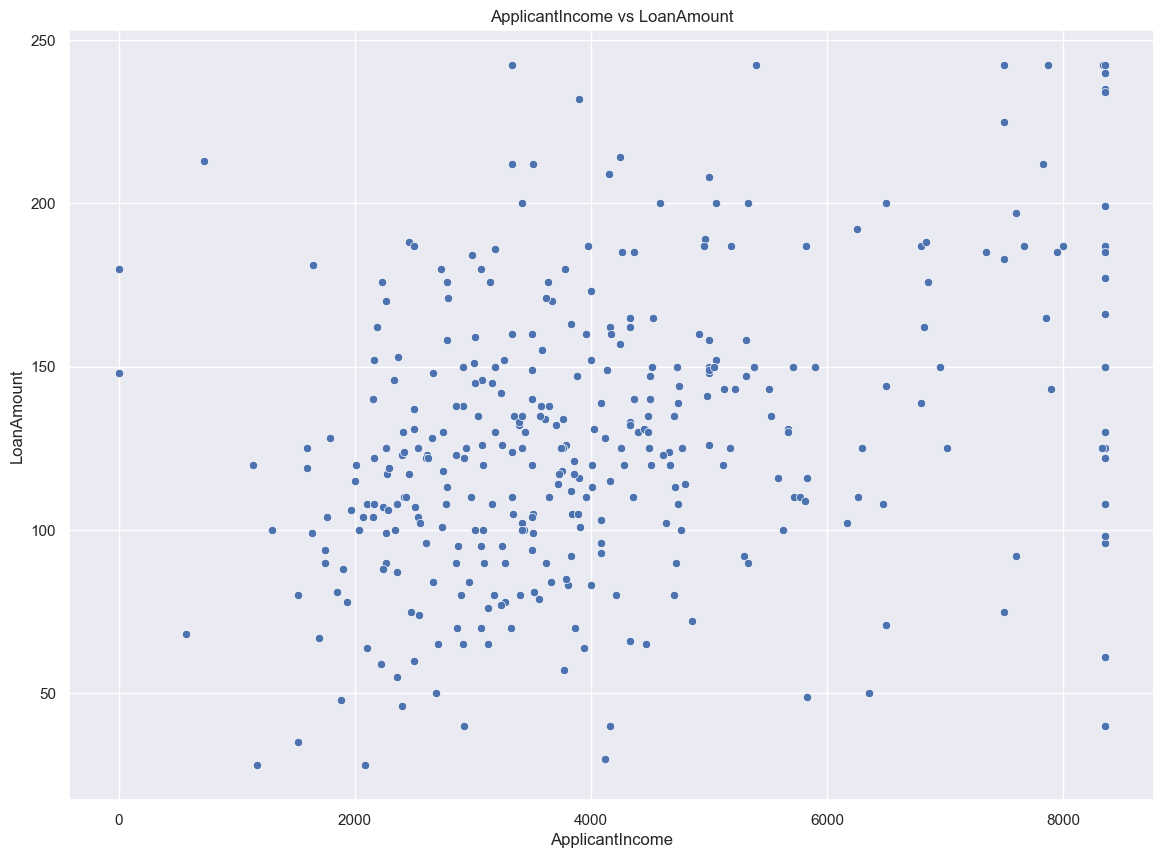

In [61]:
scatter_plot(df,'ApplicantIncome','LoanAmount')

In [62]:
def violin_plot(data,x,y):
    plt.figure(figsize=(10,6))
    sns.violinplot(data=data,x=x,y=y)
    plt.show()



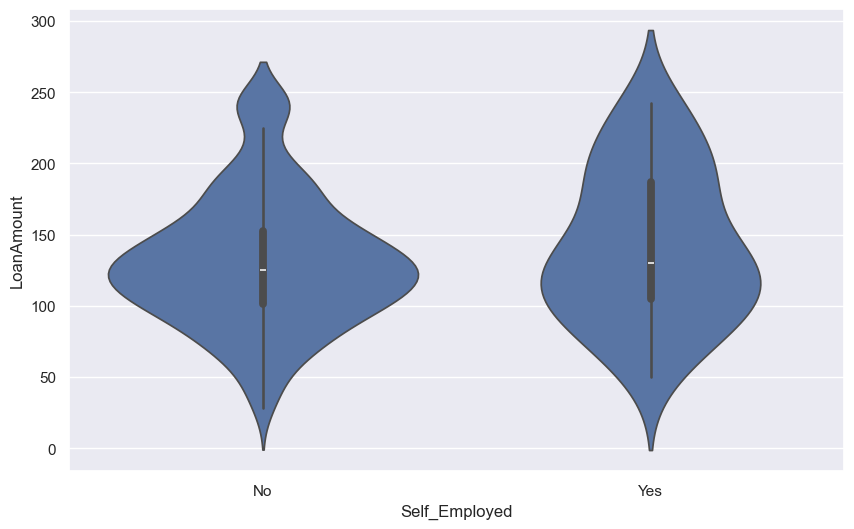

In [126]:
violin_plot(df,df['Self_Employed'],df['LoanAmount'])

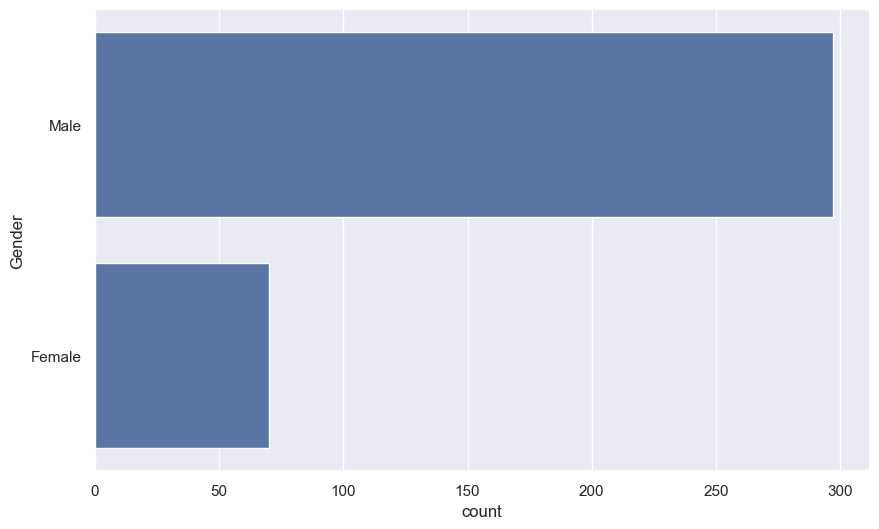

In [66]:
plt.figure(figsize=(10,6))
sns.countplot(df['Gender'])
plt.show()

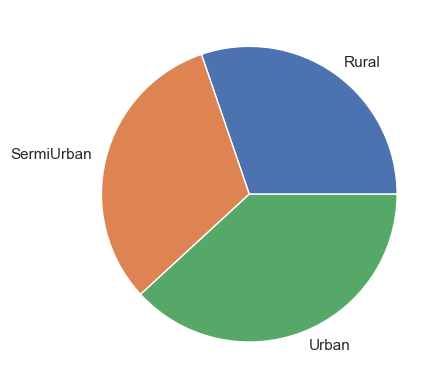

In [67]:
plt.pie(df.groupby('Property_Area')['Loan_ID'].count(),labels=["Rural",'SermiUrban','Urban'])
plt.show()

In [68]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [69]:
df['Property_Area'].value_counts()

Property_Area
Urban        140
Semiurban    116
Rural        111
Name: count, dtype: int64

## Multivariate Analysis

## 1. Correlation Matrix

In [72]:
#Category based scatter plot

<Axes: >

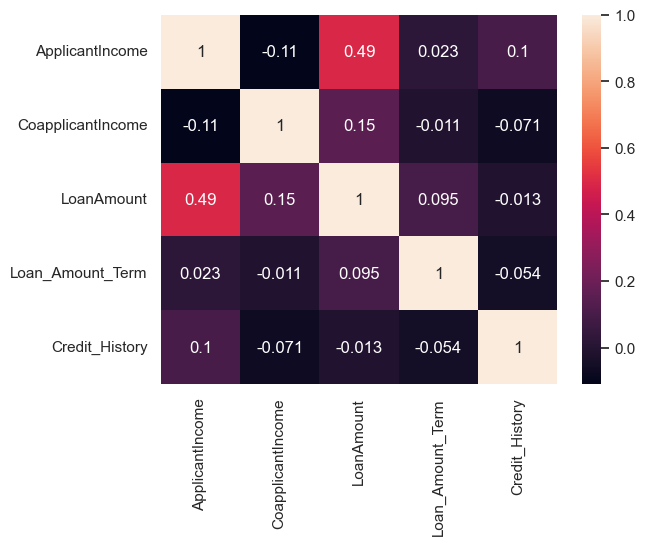

In [73]:
sns.heatmap(num_col.corr(),annot=True,cmap="rocket")

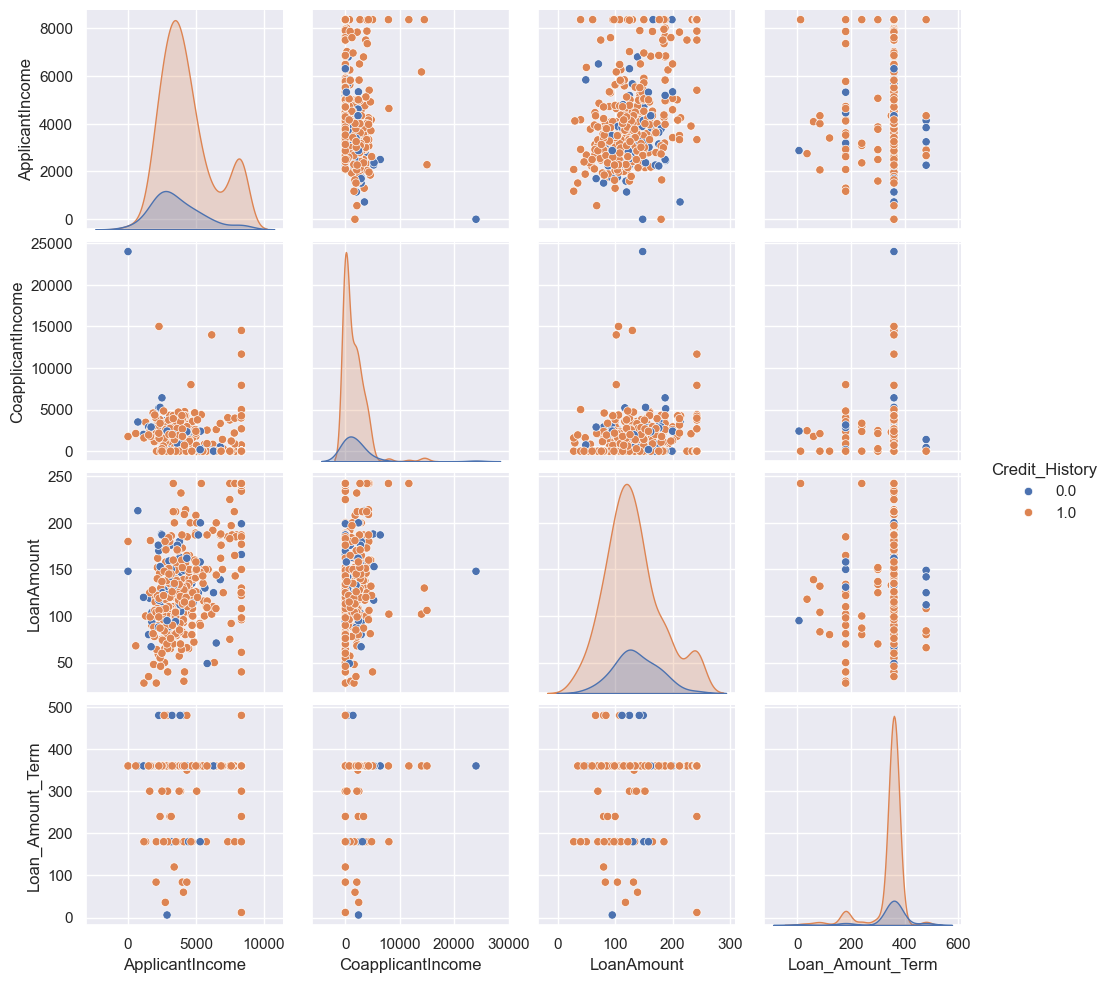

In [74]:
#pairplot


sns.pairplot(df,hue='Credit_History')